In [8]:
import pandas as pd
df=pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [10]:
n=df.isnull
print(n)

<bound method DataFrame.isnull of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['spam']=le.fit_transform(df['Category'])
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [13]:
df.drop('Category',axis=1,inplace=True)
df.head()


,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.2)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train_count=v.fit_transform(x_train.values)
x_train_count.toarray()[:50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [17]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count=v.transform(emails)
result1=model.predict(emails_count[0])
result2=model.predict(emails_count[1])

if result2==1:
     print('spam')
else:
    print('not spam')


spam


In [18]:
x_test_count=v.transform(x_test)
model.score(x_test_count,y_test)

0.989237668161435

In [19]:
#simplifying the code
from sklearn.pipeline import Pipeline
clf=Pipeline([('vectorizer',CountVectorizer()),
              ('nb',MultinomialNB())
             ])

In [20]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [21]:
clf.score(x_test,y_test)

0.989237668161435

In [22]:
result=clf.predict(emails)
res=""
for i in result:
    if result[i]==1:
        res='spam'
    else:
        res='not spam'
    print(f"{emails[i]}----->  {res}")

Hey mohan, can we get together to watch footbal game tomorrow?----->  not spam
Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!----->  spam


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [24]:
y_predicted=clf.predict(x_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[947,   2],
       [ 10, 156]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

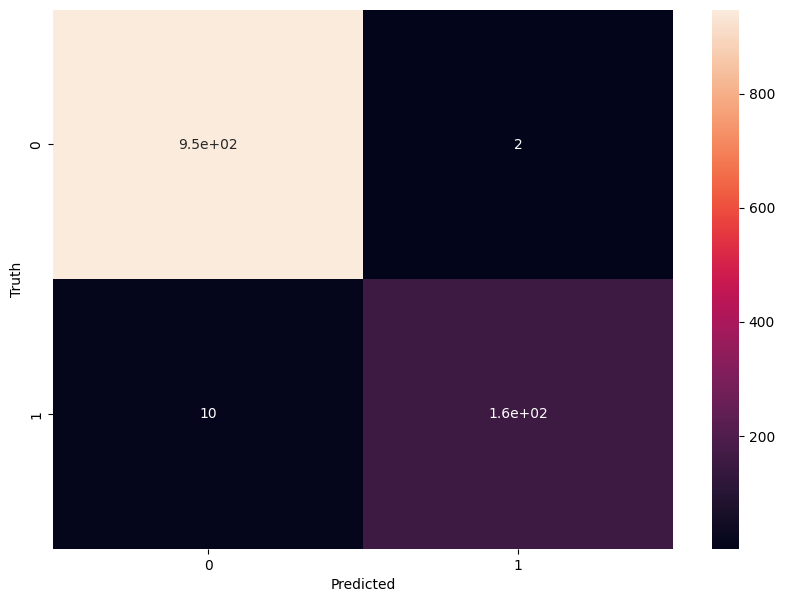

In [25]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [26]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predicted)

0.9629629629629629

In [27]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predicted)

0.9397590361445783

In [28]:
from sklearn.metrics import mean_squared_error
rse=mean_squared_error(y_test,y_predicted)
rse

0.010762331838565023

In [36]:
from sklearn.metrics import precision_score
ps=precision_score(y_test,y_predicted)
ps

0.9873417721518988

In [29]:
#saving the trained model using pickle 
import pickle
with open('model_spam_filter','wb') as f:
    pickle.dump(clf,f)

In [30]:
with open ('model_spam_filter','rb') as f:
    mp=pickle.load(f)

In [31]:
mp.predict(emails)

array([0, 1], dtype=int64)

In [32]:
mp.score(x_test,y_test)

0.989237668161435

In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,2,3,4,5,6,7,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,2,3,4,5,6,7,8,9,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,2,3,4,5,6,7,8,9,10]
        }
    },
        
}

In [39]:
from sklearn.model_selection import GridSearchCV
scores=[]

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x_test_count,y_test)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
df = pd.DataFrame(scores,columns=['model','best_score','best_params',])
df
# cv_results = pd.DataFrame(grid_search.cv_results_)
# best_model_results = cv.results.loc[grid_search.best_index_]
# best_model_results

,model,best_score,best_params
0,svm,0.967713,"{'C': 3, 'kernel': 'linear'}"
1,random_forest,0.940807,{'n_estimators': 9}
2,logistic_regression,0.966816,{'C': 3}
